In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"Data-set\fish_data.csv")

In [3]:
data.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [4]:
data.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [5]:
data.shape

(4080, 4)

In [6]:
data.isna().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [7]:
data.duplicated().sum()

109

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.shape

(3971, 4)

<Axes: xlabel='length', ylabel='weight'>

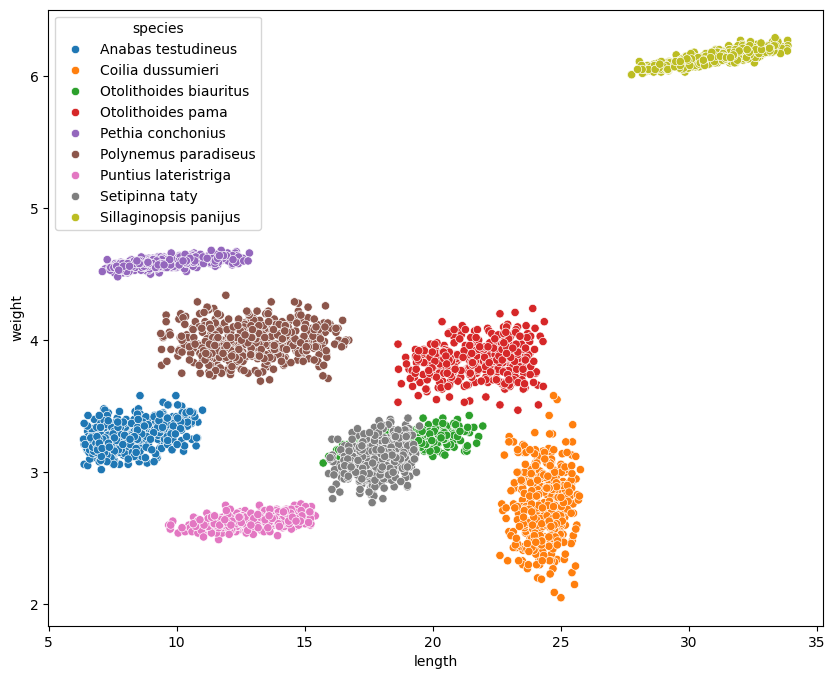

In [10]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "length", y = "weight" , data=data,hue = "species")

-------------------------------------------------------------------------------

In [11]:
X=data.drop("species",axis=1)

In [12]:
y=data["species"]

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

In [16]:
X_scaled

array([[-0.9450263 , -0.27071396,  0.55365699],
       [-1.47577487, -0.44540108,  1.77694342],
       [-1.26772143, -0.26100912,  1.28762885],
       ...,
       [ 1.74409974,  2.3107735 , -0.34341972],
       [ 2.18992853,  2.44664126, -0.50652458],
       [ 2.02150432,  2.33988802, -0.50652458]])

In [17]:
df = pd.DataFrame(X_scaled)

In [18]:
df

,0,1,2
0,-0.945026,-0.270714,0.553657
1,-1.475775,-0.445401,1.776943
2,-1.267721,-0.261009,1.287629
3,-1.382363,-0.358058,1.532286
4,-0.920966,-0.338648,0.472105
...,...,...,...
3966,1.878556,2.281659,-0.424972
3967,1.871479,2.320478,-0.424972
3968,1.744100,2.310774,-0.343420
3969,2.189929,2.446641,-0.506525


In [19]:
df.rename(columns = {0:"length",1:"weight",2:"w_l_ratio"},inplace=True)

In [20]:
df.head()

,length,weight,w_l_ratio
0,-0.945026,-0.270714,0.553657
1,-1.475775,-0.445401,1.776943
2,-1.267721,-0.261009,1.287629
3,-1.382363,-0.358058,1.532286
4,-0.920966,-0.338648,0.472105


<Axes: xlabel='length', ylabel='weight'>

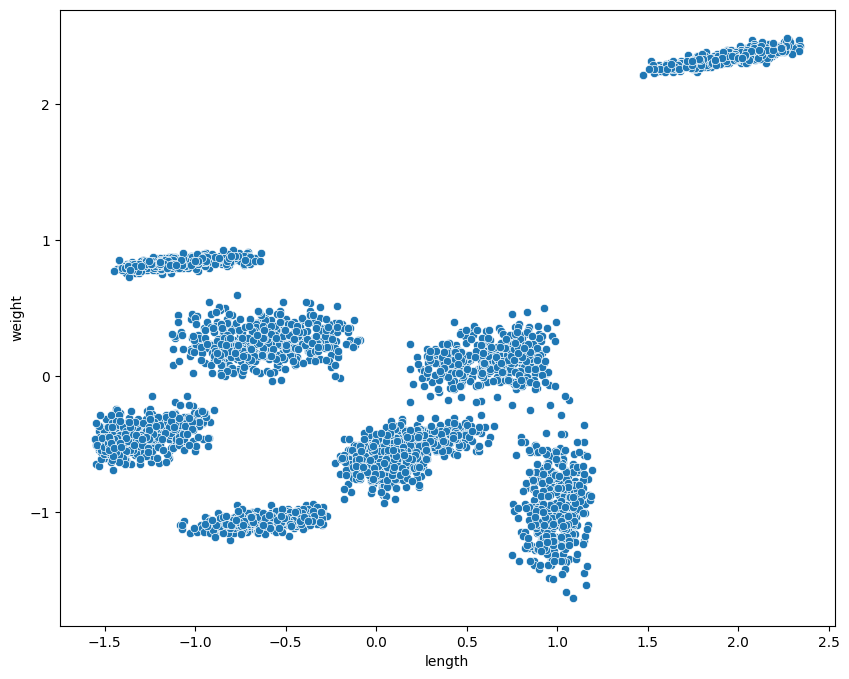

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "length", y = "weight" , data=df)

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2,random_state=42)

In [24]:
X_pca = pca.fit_transform(X_scaled)

In [25]:
X_pca

array([[-1.10352884, -0.17142811],
       [-2.32782793,  0.1054179 ],
       [-1.82161874,  0.09516115],
       ...,
       [ 1.90001121,  2.2100156 ],
       [ 2.35743209,  2.34036835],
       [ 2.21570845,  2.21556817]])

In [26]:
df["pca_1"] = X_pca[:,0]
df["pca_2"] = X_pca[:,1]

In [27]:
df.head()

,length,weight,w_l_ratio,pca_1,pca_2
0,-0.945026,-0.270714,0.553657,-1.103529,-0.171428
1,-1.475775,-0.445401,1.776943,-2.327828,0.105418
2,-1.267721,-0.261009,1.287629,-1.821619,0.095161
3,-1.382363,-0.358058,1.532286,-2.083334,0.094082
4,-0.920966,-0.338648,0.472105,-1.043830,-0.262288


<Axes: xlabel='pca_1', ylabel='pca_2'>

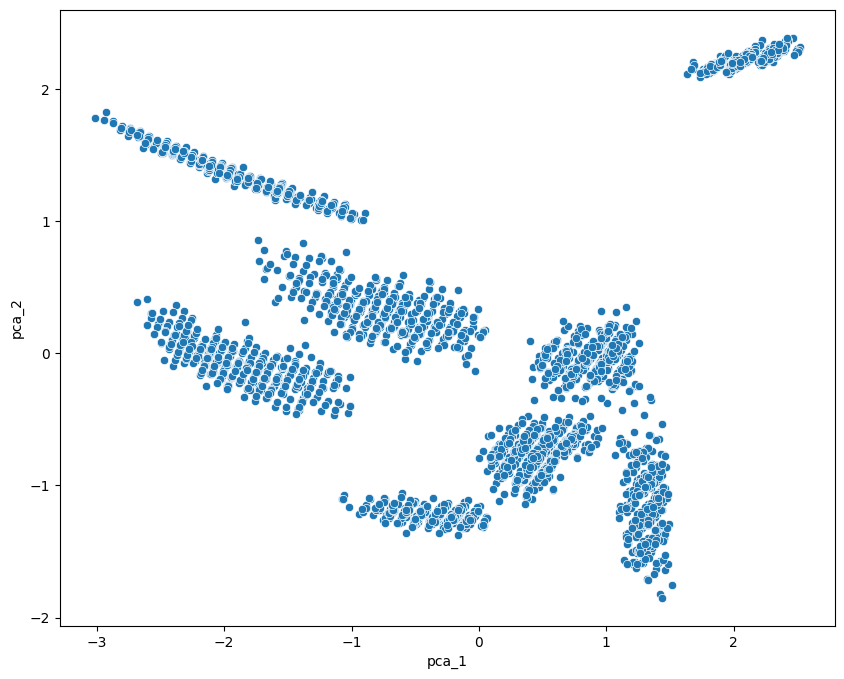

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="pca_1",y="pca_2",data=df)

In [29]:
from sklearn.cluster import KMeans

In [30]:
inertia=[]

In [31]:
for i in range(2,11):
    km = KMeans(n_clusters = i,random_state = 42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

C:\Users\ree\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ree\AppData\Roaming\Python\Python311\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Program Files\Python311\Lib\subprocess.py", line 1538, in _execute_child


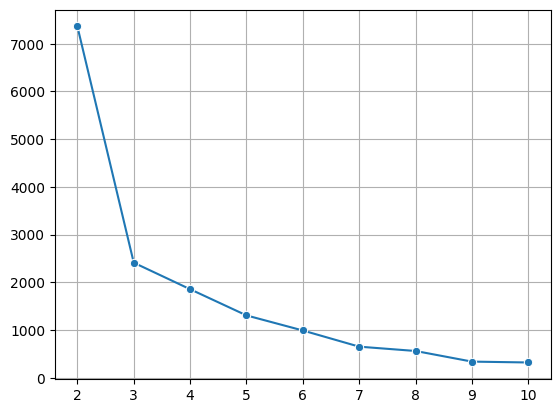

In [32]:
sns.lineplot(x = range(2,11),y=inertia,marker="o")
plt.grid()

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
ss = []

In [35]:
for i in range(2,11):
    km = KMeans(n_clusters = i,random_state=42)
    label = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled,label)
    ss.append(score)

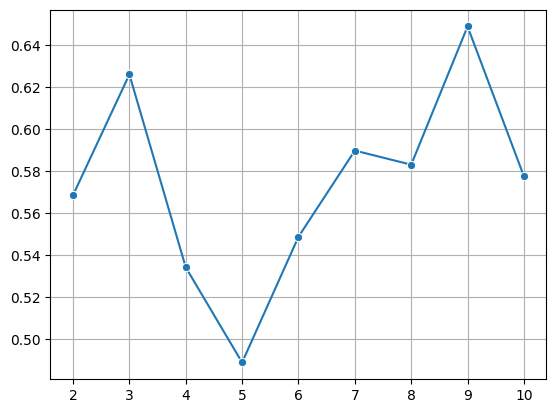

In [36]:
sns.lineplot(x = range(2,11),y=ss,marker="o")
plt.grid()

In [37]:
km = KMeans(n_clusters = 9,random_state=42)
df["cluster"] = km.fit_predict(X_scaled)

In [38]:
df["cluster"].unique()

array([7, 1, 5, 0, 3, 6, 4, 8, 2])

<Axes: xlabel='length', ylabel='weight'>

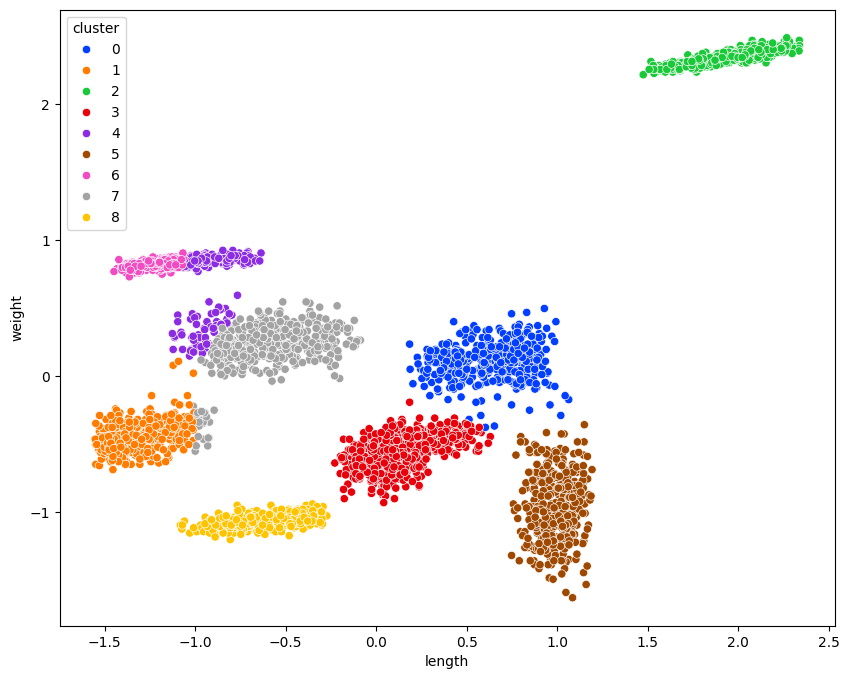

In [39]:
plt.figure(figsize=(10,8))
sns.scatterplot(x="length",y="weight",data=df,hue="cluster",palette = "bright")

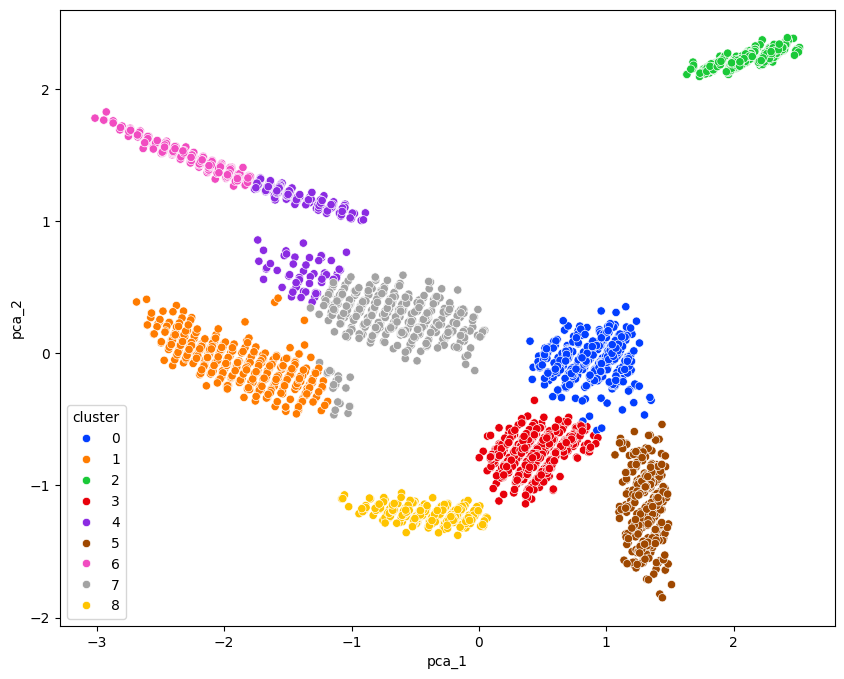

In [41]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "pca_1", y = "pca_2" , data=df,hue = "cluster",palette = "bright")
plt.savefig("Result_Img\my_plot.png")

<Axes: xlabel='length', ylabel='weight'>

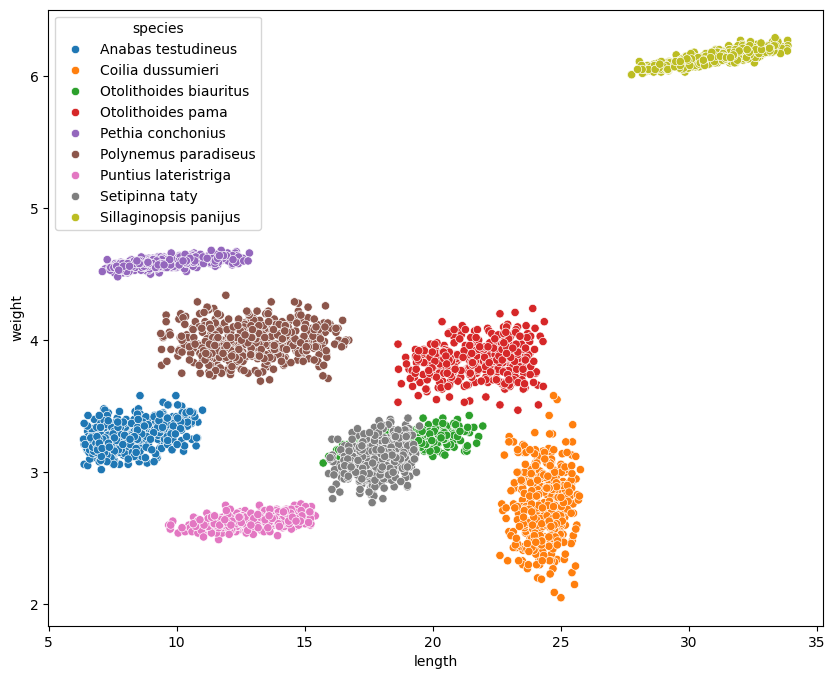

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = "length", y = "weight" , data=data,hue = "species")